In [28]:
!pip install hvplot

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [30]:

# load the dataset
df = pd.read_csv(r'C:\Users\pc\OneDrive - Higher Education Commission\Documents\Git Hub Projects\traffic.csv')
print(df.dtypes)

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object


In [31]:
#Describe the dataset
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


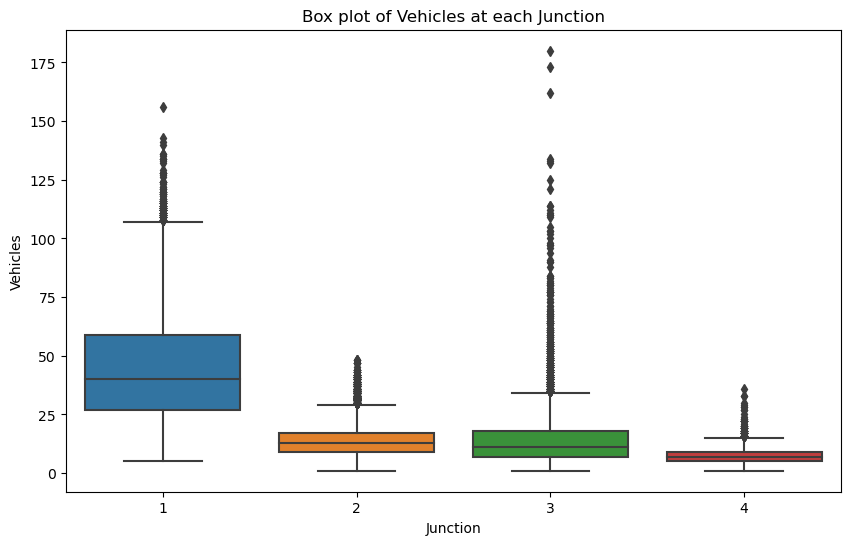

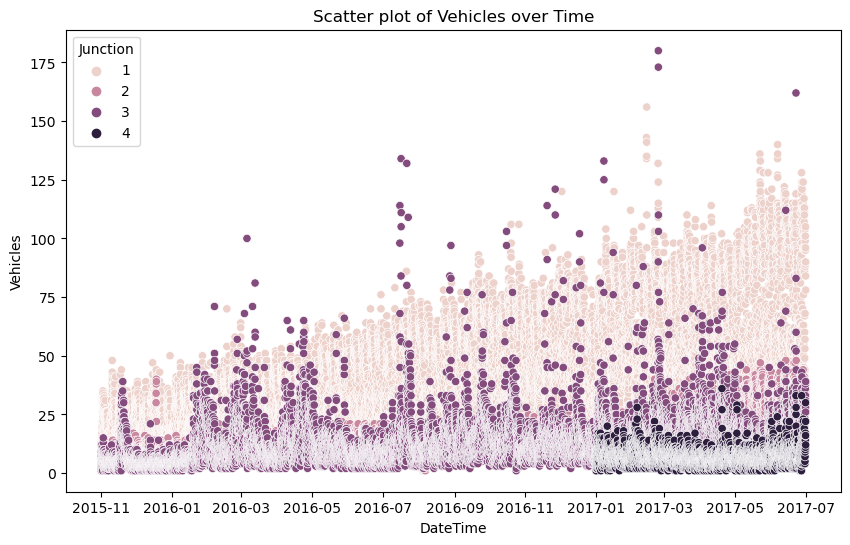

Outliers based on Z-score:
                 DateTime  Junction  Vehicles           ID   Z_score
6323  2016-07-21 11:00:00         1        86  20160721111  3.046223
7814  2016-09-21 14:00:00         1        89  20160921141  3.190803
7818  2016-09-21 18:00:00         1        93  20160921181  3.383575
7819  2016-09-21 19:00:00         1        91  20160921191  3.287189
7859  2016-09-23 11:00:00         1        90  20160923111  3.238996
...                   ...       ...       ...          ...       ...
40725 2017-02-23 21:00:00         3       110  20170223213  4.202858
40726 2017-02-23 22:00:00         3       103  20170223223  3.865506
41634 2017-04-02 18:00:00         3        96  20170402183  3.528155
43362 2017-06-13 18:00:00         3       112  20170613183  4.299245
43574 2017-06-22 14:00:00         3       162  20170622143  6.708901

[988 rows x 5 columns]
Outliers based on IQR:
                 DateTime  Junction  Vehicles           ID   Z_score
2603  2016-02-17 11:00:00    

In [32]:
# identifying and handling anomalies in your data
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Visualize the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Junction', y='Vehicles', data=df)
plt.title('Box plot of Vehicles at each Junction')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DateTime', y='Vehicles', hue='Junction', data=df)
plt.title('Scatter plot of Vehicles over Time')
plt.show()

# Detect outliers using Z-score
from scipy.stats import zscore

df['Z_score'] = np.abs(zscore(df['Vehicles']))
outliers = df[df['Z_score'] > 3]
print("Outliers based on Z-score:")
print(outliers)

# Detect outliers using IQR
Q1 = df['Vehicles'].quantile(0.25)
Q3 = df['Vehicles'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Vehicles'] < (Q1 - 1.5 * IQR)) | (df['Vehicles'] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR:")
print(outliers_iqr)

# Handle outliers (example: remove them)
df_cleaned = df[(df['Vehicles'] >= (Q1 - 1.5 * IQR)) & (df['Vehicles'] <= (Q3 + 1.5 * IQR))]
print("Data after removing outliers:")
print(df_cleaned)

<Figure size 1200x600 with 0 Axes>

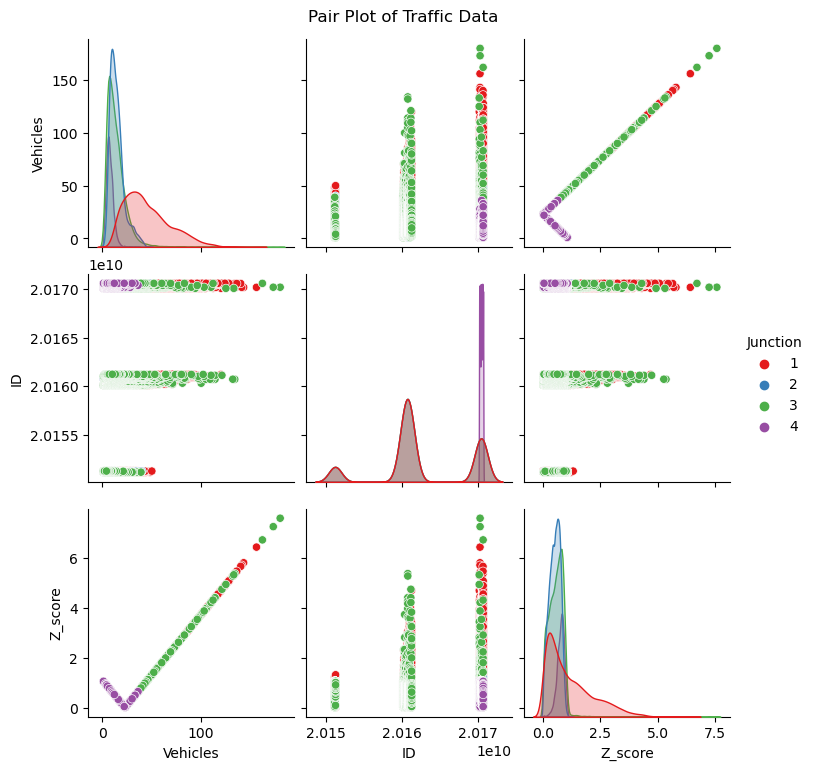

In [33]:
plt.figure(figsize=(12, 6))


sns.pairplot(df, hue='Junction', palette='Set1')
plt.suptitle('Pair Plot of Traffic Data', y=1.02)
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Vehicles'])
y = df['Vehicles']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (38496, 4)
Testing set size: (9624, 4)


Mean Squared Error: 163.29367424233672
R^2 Score: 0.5993252880298784


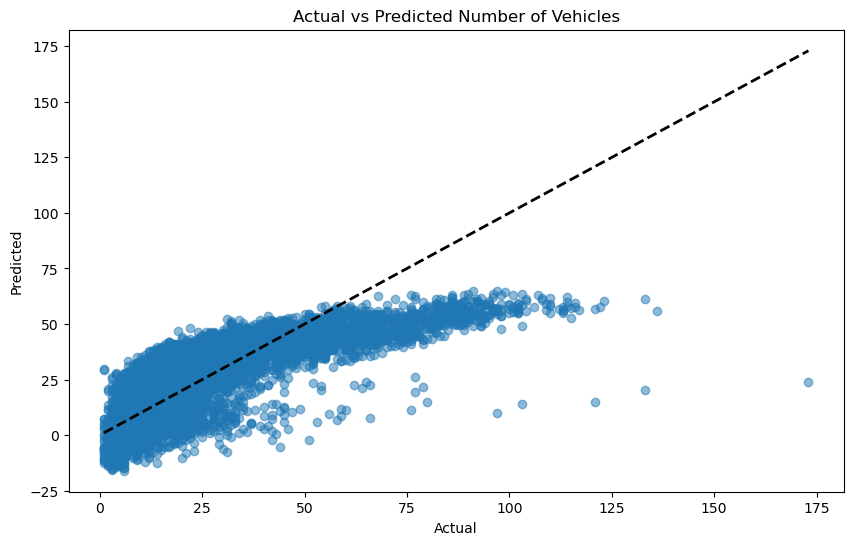

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert DateTime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract useful features from DateTime
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year

# Define the features and target variable
X = df[['Junction', 'Hour', 'DayOfWeek', 'Month', 'Year']]
y = df['Vehicles']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Number of Vehicles')
plt.show()


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on the testing set
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest Mean Squared Error: 30.290452524595203
Random Forest R^2 Score: 0.92567612678783
